In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import plotly.express as pex

In [29]:
df = pd.read_excel("C:\\Users\\Raj-Lenovo\\Desktop\\FORE\\TERM-4\\BDDA\\EU_Superstore_Dataset.xlsx")

In [30]:
df.head()

,Row ID,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,Country/Region,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1.0,ES-2022-1311038,2022-07-02 00:00:00,2022-11-02 00:00:00,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3.0,0.0,39.60
1,2.0,ES-2022-1311038,2022-07-02 00:00:00,2022-11-02 00:00:00,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7.0,0.0,0.00
2,3.0,ES-2022-1311038,2022-07-02 00:00:00,2022-11-02 00:00:00,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3.0,0.0,16.11
3,4.0,ES-2022-1311038,2022-07-02 00:00:00,2022-11-02 00:00:00,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2.0,0.0,13.20
4,5.0,ES-2022-1311038,2022-07-02 00:00:00,2022-11-02 00:00:00,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3.0,0.0,73.71


In [31]:
france_df=df[df["Country/Region"]=="France"]
france_df.head()

,Row ID,Order ID,Order Date,Dispatch Date,Delivery Mode,Customer ID,Customer Name,Segment,City,State/Province,Country/Region,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
10,11.0,ES-2020-2510515,20-06-2020,20-06-2020,Same Day,LH-17155,Logan Haushalter,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,France,Central,OFF-LA-10002805,Office Supplies,Labels,"Hon Color Coded Labels, Alphabetical",25.260,2.0,0.00,0.480
11,12.0,ES-2020-2510515,20-06-2020,20-06-2020,Same Day,LH-17155,Logan Haushalter,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,France,Central,OFF-AP-10002330,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",2443.905,5.0,0.10,760.305
12,13.0,ES-2020-2510515,20-06-2020,20-06-2020,Same Day,LH-17155,Logan Haushalter,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,France,Central,OFF-AR-10000505,Office Supplies,Art,"Binney & Smith Pens, Easy-Erase",12.210,1.0,0.00,0.000
13,14.0,ES-2020-2510515,20-06-2020,20-06-2020,Same Day,LH-17155,Logan Haushalter,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,France,Central,TEC-PH-10002898,Technology,Phones,"Samsung Smart Phone, Full Size",2167.296,4.0,0.15,790.416
14,15.0,ES-2020-2510515,20-06-2020,20-06-2020,Same Day,LH-17155,Logan Haushalter,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,France,Central,OFF-ST-10001413,Office Supplies,Storage,"Rogers Folders, Blue",138.105,5.0,0.10,-12.345


In [32]:
france_df.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000
mean,4987.330032,303.831299,3.821719,0.072285,38.567033
std,2906.583818,466.924728,2.257185,0.119943,138.327805
min,11.000000,4.455000,1.000000,0.000000,-1694.592000
25%,2359.000000,53.217000,2.000000,0.000000,3.285000
50%,5123.000000,130.950000,3.000000,0.000000,16.440000
75%,7484.500000,339.030000,5.000000,0.100000,49.000500
max,9994.000000,5729.346000,14.000000,0.650000,1868.130000


In [33]:
#Finding out missing values in each column
france_df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Dispatch Date     0
Delivery Mode     0
Customer ID       0
Customer Name     0
Segment           0
City              0
State/Province    0
Country/Region    0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

# Data Visualization


In [34]:
france_df.corr()

,Row ID,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.006041,-0.002468,0.024489,-0.014881
Sales,0.006041,1.000000,0.351667,0.223528,0.416025
Quantity,-0.002468,0.351667,1.000000,0.010040,0.133227
Discount,0.024489,0.223528,0.010040,1.000000,-0.223628
Profit,-0.014881,0.416025,0.133227,-0.223628,1.000000


In [35]:
cat=france_df.select_dtypes(include=['object']).columns.tolist()
cat

['Order ID',
 'Order Date',
 'Dispatch Date',
 'Delivery Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State/Province',
 'Country/Region',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name']

In [36]:
nums=france_df.select_dtypes(exclude=['object']).columns.tolist()
nums

['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit']

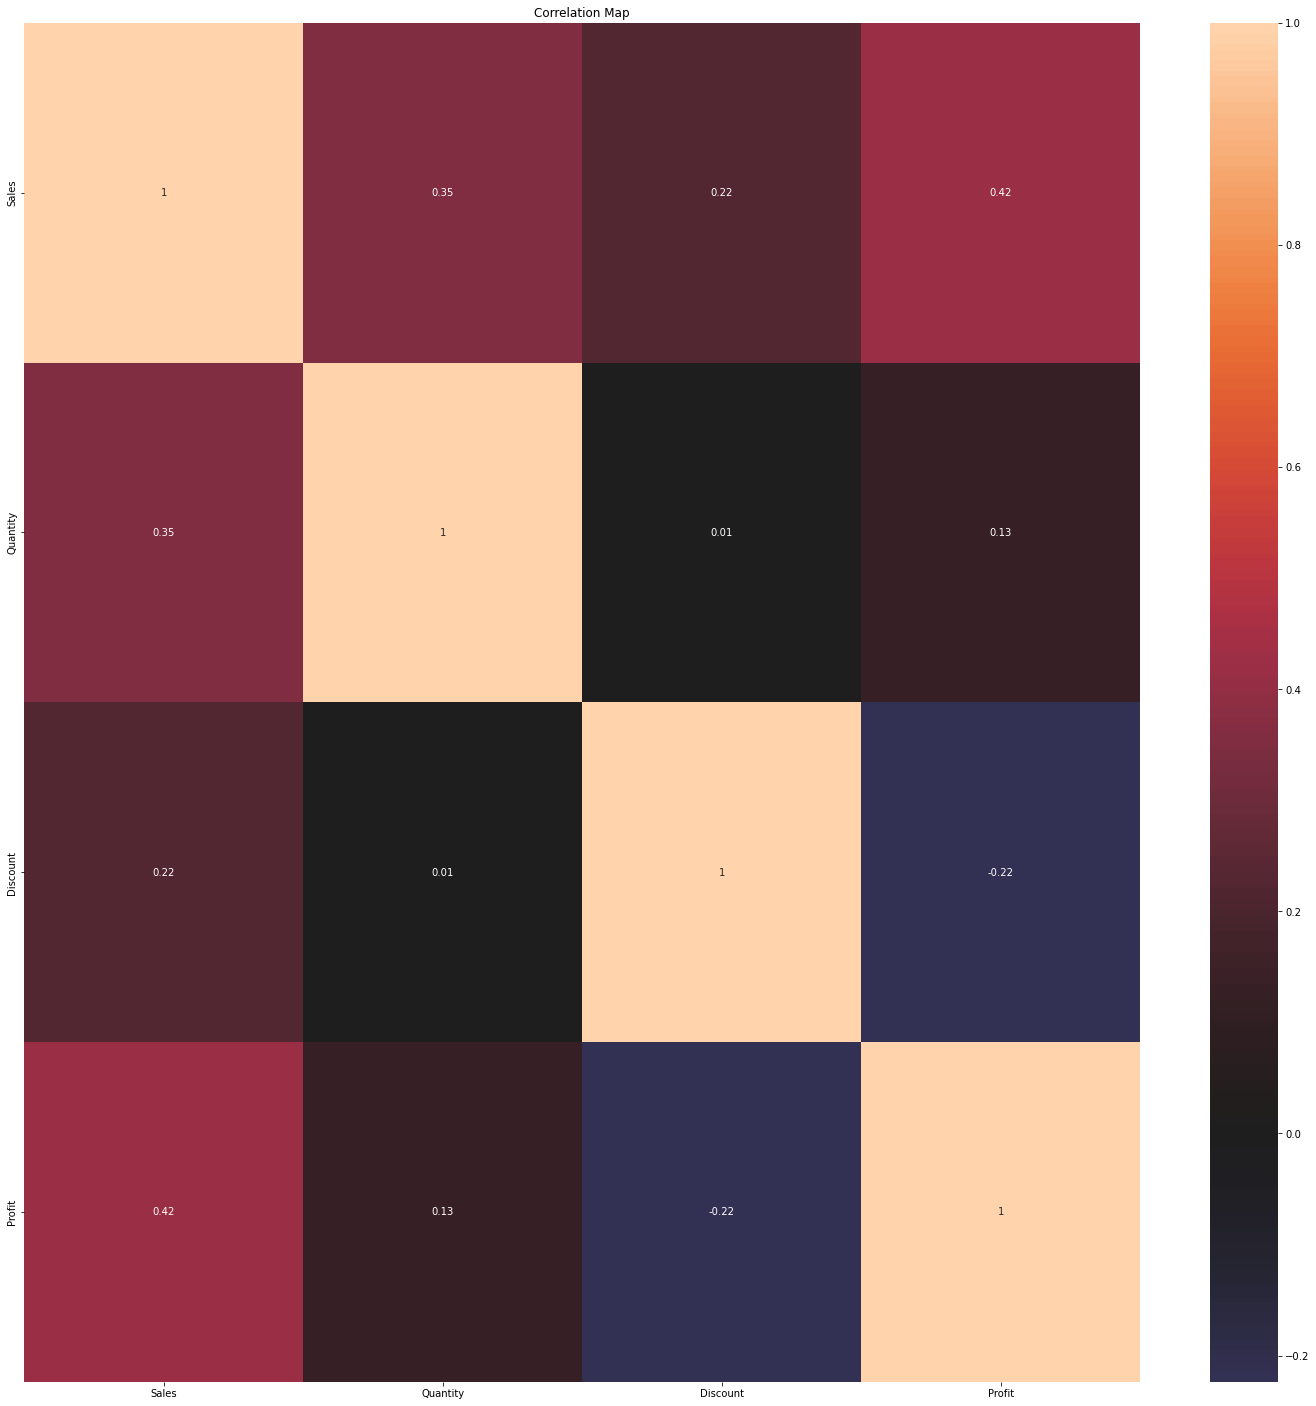

In [25]:
#visualization
plt.figure(figsize=(25,25))
sns.heatmap(france_df[nums].corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

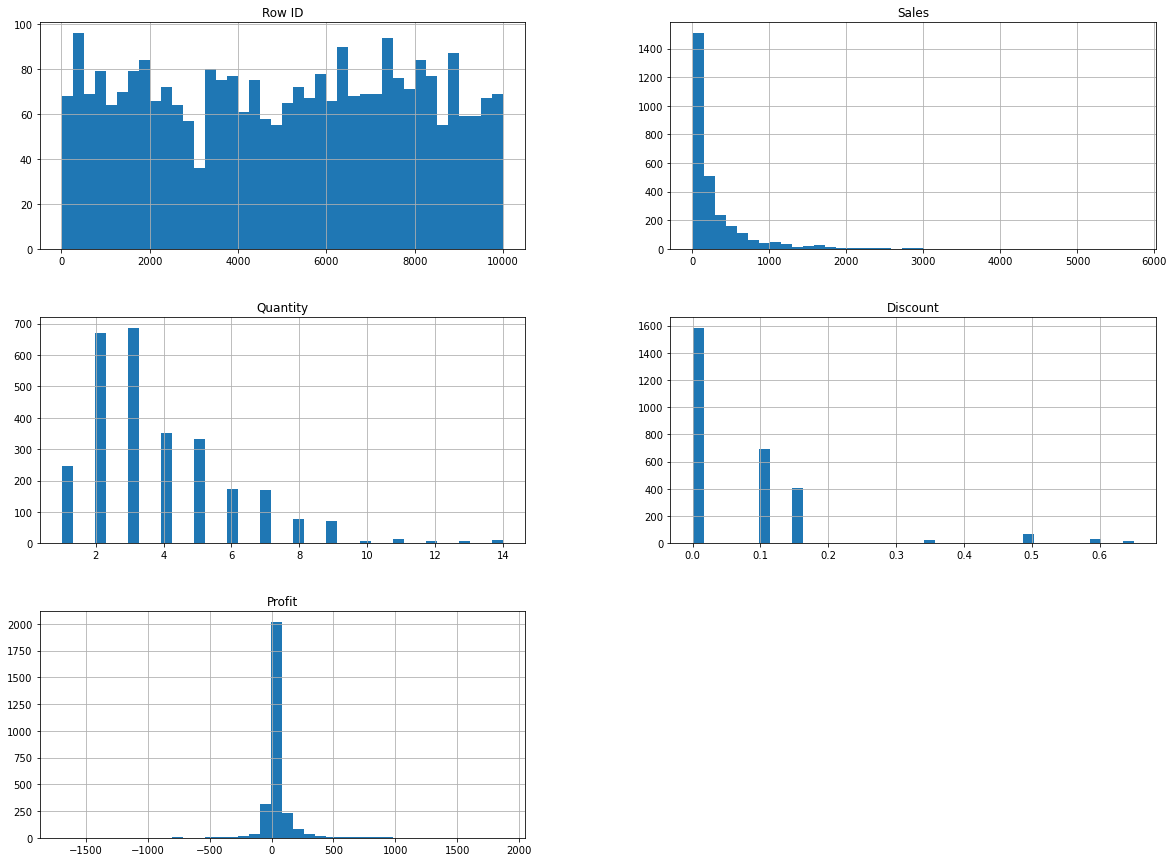

In [37]:
# Histogram of all the numerical attributes
france_df[nums].hist(bins=40, figsize=(20,15)) 
plt.show()

# Preprocessing


In [38]:
def tranform_date(france_df, column):
    
    france_df = france_df.copy()
    
    to_datetime_column = pd.DataFrame(pd.to_datetime(france_df[column]))
    to_datetime_column[column + ' year'] = to_datetime_column[column].apply(lambda x: x.year)
    to_datetime_column[column + ' month'] = to_datetime_column[column].apply(lambda x: x.month)
    to_datetime_column[column + ' day'] = to_datetime_column[column].apply(lambda x: x.day)
    
    to_datetime_column.drop(column, axis=1, inplace=True)
    france_df.drop(column, axis=1, inplace=True)
    
    france_df = pd.concat([france_df, to_datetime_column], axis=1)
    
    return df


In [43]:
france_df1= france_df.copy()


france_df1 = france_df1.drop(['Row ID', 'Order ID', 'Customer ID','Customer Name',
                  'Country/Region', 'Product ID', 'Product Name'], axis=1)

to_datetime_column = pd.DataFrame(pd.to_datetime(france_df1['Order Date']))
to_datetime_column['Order Date' + ' year'] = to_datetime_column['Order Date'].apply(lambda x: x.year)
to_datetime_column['Order Date' + ' month'] = to_datetime_column['Order Date'].apply(lambda x: x.month)
to_datetime_column['Order Date' + ' day'] = to_datetime_column['Order Date'].apply(lambda x: x.day)
    
to_datetime_column.drop('Order Date', axis=1, inplace=True)
france_df1.drop('Order Date', axis=1, inplace=True)
    
france_df1 = pd.concat([france_df1, to_datetime_column], axis=1)
    
france_df1.drop('Order Date day', axis=1, inplace=True)

In [44]:
france_df1.head()

,Dispatch Date,Delivery Mode,Segment,City,State/Province,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Date year,Order Date month
10,20-06-2020,Same Day,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,Central,Office Supplies,Labels,25.260,2.0,0.00,0.480,2020,6
11,20-06-2020,Same Day,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,Central,Office Supplies,Appliances,2443.905,5.0,0.10,760.305,2020,6
12,20-06-2020,Same Day,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,Central,Office Supplies,Art,12.210,1.0,0.00,0.000,2020,6
13,20-06-2020,Same Day,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,Central,Technology,Phones,2167.296,4.0,0.15,790.416,2020,6
14,20-06-2020,Same Day,Consumer,Le Bouscat,Aquitaine-Limousin-Poitou-Charentes,Central,Office Supplies,Storage,138.105,5.0,0.10,-12.345,2020,6


In [47]:
df_numerical = france_df1.groupby(['Order Date year', 'Order Date month']).sum().reset_index()

In [49]:
df_numerical.head()

,Order Date year,Order Date month,Sales,Quantity,Discount,Profit
0,2019,1,5045.4015,151.0,4.85,65.3115
1,2019,2,7649.6055,89.0,3.40,1823.6955
2,2019,3,6921.4650,85.0,1.45,1145.6250
3,2019,4,12226.0530,172.0,1.80,1959.9030
4,2019,5,10235.5635,120.0,1.90,180.8535


In [50]:
cat = ['Category', 'Sub-Category', 'Delivery Mode', 'State/Province', 'Segment'] 
df_categorical = pd.DataFrame()

In [52]:
for column in cat:
    temp_df = france_df1.groupby(['Order Date year', 'Order Date month'])[column].value_counts().unstack().reset_index()
    new_columns = france_df1[column].value_counts().index
    
    temp= pd.DataFrame(temp_df[new_columns].values, columns=new_columns)
    df_categorical = pd.concat([df_categorical, temp], axis=1)
df_categorical.fillna(0, inplace=True)

In [53]:
df1 = pd.concat([df_numerical, df_categorical], axis=1).fillna(0)

In [54]:
df1.head()

,Order Date year,Order Date month,Sales,Quantity,Discount,Profit,Office Supplies,Technology,Furniture,Art,...,Alsace-Champagne-Ardenne-Lorraine,Pays de la Loire,Normandy,Brittany,Centre-Val de Loire,Bourgogne-Franche-Comté,Corsica,Consumer,Corporate,Home Office
0,2019,1,5045.4015,151.0,4.85,65.3115,22,1,7,7.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,10.0,1.0
1,2019,2,7649.6055,89.0,3.40,1823.6955,15,7,2,3.0,...,5.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,10.0,0.0
2,2019,3,6921.4650,85.0,1.45,1145.6250,15,6,1,1.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,8.0
3,2019,4,12226.0530,172.0,1.80,1959.9030,32,5,4,7.0,...,6.0,3.0,6.0,0.0,0.0,0.0,0.0,19.0,12.0,10.0
4,2019,5,10235.5635,120.0,1.90,180.8535,15,6,4,8.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,7.0,14.0


# Train & Test Data

In [56]:
from sklearn.preprocessing import StandardScaler

condition = df1['Order Date year'] < 2022
target = 'Profit'
year = 'Order Date year'


# Spliting data
X_train = df1[condition].drop([target, year], axis=1)
X_test = df1[(-condition)].drop([target, year], axis=1)
y_train = df1[condition][target]
y_test = df1[(-condition)][target]

# Scaling data
scaler = StandardScaler()
scaler.fit(X_train)

# Applying scaling
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [58]:
from sklearn.metrics import mean_squared_error
size=24

_X_train, _X_val, _y_train, _y_val = X_train_scaled[:size], X_train_scaled[size:], y_train[:size], y_train[size:]

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


# Set random state to 0
np.random.seed(0)

models = [LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor()]

model_names = ['Linear Regression', 'Random Forest', 'Decision Tree']

model_rmse = []
model_r2 = []
models_ = []

for model in models:
    
    # Fit each model
    model.fit(_X_train, _y_train)
    models_.append(model)

    # Calculate RMSE (error)
    mse = mean_squared_error(_y_val, model.predict(_X_val))
    rmse = np.sqrt(mse)
    
    # Save values
    model_rmse.append(rmse)
    
df_rmsemodels = pd.DataFrame(model_rmse, index=model_names, columns=['RMSE'])
df_models.sort_values('RMSE')



,RMSE
Random Forest,1935.366201
Decision Tree,1983.311424
Linear Regression,2456.331466


In [80]:
print(X_train.shape)

(36, 84)


In [81]:
print(X_test.shape)

(12, 84)


In [82]:
print(y_train.shape)

(36,)


In [83]:
print(y_test.shape)

(12,)


In [96]:
rf = RandomForestRegressor(max_depth=30, min_samples_split=14, min_samples_leaf=2, 
                                                max_leaf_nodes=63, n_jobs=-1, random_state=0, n_estimators=100)

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

# MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
models_error = []
models_error.append(rmse)
    
print('Mean Squared Error: ',models_error)


Mean Squared Error:  [1112.6213706823112]


In [99]:
# get the feature importances
coef = models[1].feature_importances_

# plot figure importances
columns = X_train_scaled.columns
randomforest_coef = pd.DataFrame(data=[coef], columns=columns).transpose().reset_index()
randomforest_coef.columns = ['Attribute', 'Coefficient']

sorted_randomforest = randomforest_coef.sort_values('Coefficient', ascending=False)
sorted_randomforest
pex.histogram(data_frame=sorted_randomforest, x='Attribute', y='Coefficient')

In [100]:
dfa = pd.DataFrame(france_df.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())

dfa

,Sales,Profit,Quantity
Category,,,
Furniture,242117.127,26143.917,1633.0
Office Supplies,304763.538,53688.198,7091.0
Technology,312050.418,29196.888,2080.0


In [106]:
dfb = pd.DataFrame(france_df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

# Sort by descending order according to sales

subcat_dfb = pd.DataFrame(dfb.sort_values('Profit', ascending = False))

subcat_dfb

,Sales,Profit
Sub-Category,,
Chairs,91514.568,14554.638
Storage,96580.482,13231.152
Bookcases,95310.936,11822.466
Appliances,78103.731,11057.571
Accessories,49149.270,10741.290
Art,47016.030,10508.760
Phones,89964.087,7779.897
Binders,33894.195,7447.125
Furnishings,22553.190,5685.570


In [111]:
dfc = pd.DataFrame(france_df.groupby(['Segment'])[['Profit']].count())

dfc

,Profit
Segment,
Consumer,1455
Corporate,884
Home Office,488


C:\Users\Raj-Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



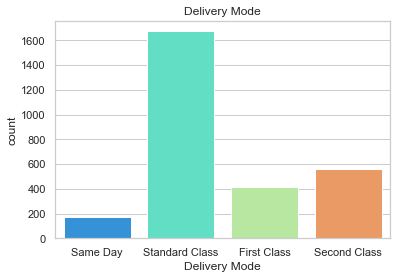

In [110]:
sns.set_theme(style="whitegrid")
sns.countplot(france_df['Delivery Mode'], palette = "rainbow")

plt.title("Delivery Mode")

plt.show()

In [113]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))
# Plot barplots
cat1 = sns.barplot(x = france_df.index, y = france_df.Sales, ax=axis[0], palette = "rainbow")
cat2 = sns.barplot(x = france_df.index, y = france_df.Profit, ax=axis[1], palette = "pastel")
cat3 = sns.barplot(x = france_df.index, y = france_df.Quantity, ax=axis[2], palette = "winter")
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

Error in callback <function flush_figures at 0x00000206AD5CF4C0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sns.set_theme(style="whitegrid")


figure, axis = plt.subplots(1, 2, figsize=(12, 6))

subcat1 = sns.barplot(data = subcat_df2, x = subcat_df2.index, y = subcat_df2.Sales, ax=axis[0], palette = "rainbow")
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

subcat2 = sns.barplot(data = subcat_profit_df2, x = subcat_profit_df2.index, y = subcat_profit_df2.Profit, ax=axis[1], palette = "coolwarm")
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

figure.tight_layout()

plt.show()